### Data analysis 

Here we analyse data extracted from twitter with hashtag "openscience". We also plan to look here at the geolocation of twitts with hashtag "openscience" in analogy to the project "Where_Surfers_Travel" on git.

*This project is in collaboration with Lisa (CorrelAid), Jon (Open Science MOOC), Liubov (CRI, Lecturers without borders)*

### Research questions 

One question is how different is hashtag "openscience", which is used by growing community of researchers  in twitter. 
What is the growth slope? Why is it not exponential and when it can become $e^{b t}$?

Can we see trends and diffusion of "openscience" as continuous ($d O/dt = Dd^2 O/dt^2$)  or sporadic process? Can we refer to spreading of open science ideas as innovation processes described in [Rogers, "Diffusion of innovations"]?

Can simple network based voter model explain slow growth of "open science" community?
Can twitter activity on open science grasp its non-linear growth rate of population?


In [6]:
import networkx as nx 
import csv
import matplotlib.pyplot as plt
import pandas as pd

#import plotly.plotly as py
#import plotly.graph_objs as go

#df_twitts = pd.read_csv('C:/Users/lyubo/Documents/DATA_networks/twitter/openscience_tweets.csv')
#df_twitts.head()



Let us analyze openscience grassroots, which are 
based on this list: https://docs.google.com/spreadsheets/d/1LNF5_bOkRV-RLIF4HYmu-gOemIa4IdfXEer89fM-Vy8/edit#gid=0 

Lisa cleaned it and downloaded the Twitter profiles for all handles that are mentioned in sheet 1.

In [7]:
#load data 

import networkx as nx 
import csv
import matplotlib.pyplot as plt
import pandas as pd

#df_tw_net = pd.read_csv('C:/Users/lyubo/Documents/DATA_networks/openscience_data/openscience_network.csv')
#df_tw_net.head()

with open('C:/Users/lyubo/Documents/DATA_networks/openscience_data/openscience_network.csv') as csv_file:
    csv_reader = csv.reader(csv_file)#, delimiter=';')
    line_count = 0
    for row in csv_reader:
    # read each line, community, detect when they were created
        line_count += 1
    print(f'Processed {line_count} lines.')


    


Processed 129 lines.


#### Local twitter analysis

Let us analyze data which we have locally on a server. Everyone can get their own data from twitter. In order to get them please read this https://help.twitter.com/en/managing-your-account/how-to-download-your-twitter-archive 

It will take some time, then it is data visualisation time. We modify some of the packages from here https://towardsdatascience.com/having-fun-with-your-twitter-using-python-f9e0a7684867 

#### Research question

We want to learn about the metadat of the person from his/her/mine tweets.

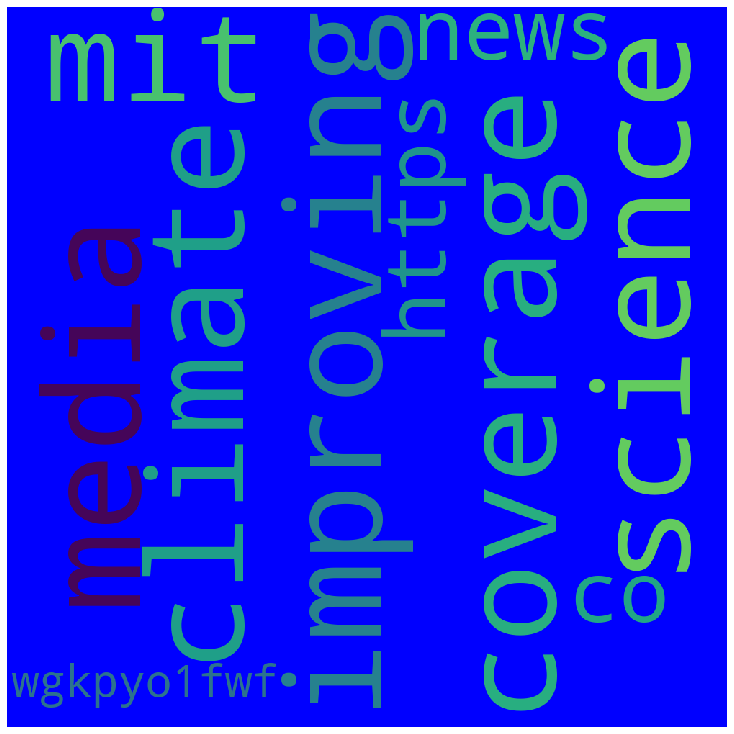

In [16]:

import pandas as pd 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

df=pd.read_csv(r"C:/Users/lyubo/Documents/DATA_networks/twitter/2889619139_dcd6b4d18c27a1726c145c8c1ead86d14f96282a/tweets.csv",encoding="latin-1")

#let us look at the data to read also the names of columns
df.head()

comment_words = ' ' 
#We will be appending the words to this var 
stopwords = set(STOPWORDS) 



#Finds all stop words in the set of tweets.

rawtext = []

for val in df.text:   
    
    val = str(val) #convert all tweet content into strings   
    tokens = val.split() #Split all strings into individual components  
    rawtext.append(tokens)
    
    for i in range(len(tokens)):      
        tokens[i] = tokens[i].lower() #Converts all the individual strings to lower case.
        
for words in tokens:
    comment_words = comment_words + words + ' '
    
    
#visulise tweets     
wordcloud=WordCloud(width=1000,height=1000, background_color='blue', stopwords=stopwords,min_font_size=10).generate(comment_words)
plt.figure(figsize=(10,10),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


#### NLP analysis 

Now we want to retrieve the information about the nature of the main tweets, e.g. 
if it is science, technology, bussiness. 
This is quite easy to do given that there are more than 100 keywords. So we first are checking the number of keywords.

We will use the following NLP Python libraries re, nltk, pickle and some others...


In [10]:

print(comment_words)

 improving media coverage of climate science | mit news https://t.co/wgkpyo1fwf 


In [11]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lyubo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


#### Analyzing words using numbers 
Bag of Words is used and described here  https://stackabuse.com/text-classification-with-python-and-scikit-learn/
The following script uses the bag of words model to convert text documents into corresponding numerical features:



In [35]:
#print(rawtext)

print(type(rawtext))
string_rawtext  = ', '.join(','.join(elems) for elems in rawtext)
#print(string_rawtext)


print(type(string_rawtext))

<class 'list'>
<class 'str'>


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))

X = vectorizer.fit_transform(string_rawtext).toarray()


work in progress...